In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import nltk
import seaborn as sns
from sklearn.decomposition import PCA


In [74]:
dataset_path = '/content/drive/MyDrive/jobss.csv'
df = pd.read_csv(dataset_path)
print(df.head())

                                           Job Title  Unnamed: 1  \
0                              Digital Media Planner         NaN   
1                           Online Bidding Executive         NaN   
2   Trainee Research/ Research Executive- Hi- Tec...         NaN   
3                                  Technical Support         NaN   
4                  Software Test Engineer -hyderabad         NaN   

  Job Experience Required                                         Key Skills  \
0              5 - 10 yrs                      Media Planning| Digital Media   
1               2 - 5 yrs   pre sales| closing| software knowledge| clien...   
2               0 - 1 yrs   Computer science| Fabrication| Quality check|...   
3               0 - 5 yrs                                  Technical Support   
4               2 - 5 yrs   manual testing| test engineering| test cases|...   

                                Role Category   Location  \
0                                 Advertising     

In [75]:
#Keep only the relevant columns in the original DataFrame
df.drop(df.columns.difference(['Job Title', 'Key Skills']), axis=1, inplace=True)

In [76]:
print(df.head())

                                           Job Title  \
0                              Digital Media Planner   
1                           Online Bidding Executive   
2   Trainee Research/ Research Executive- Hi- Tec...   
3                                  Technical Support   
4                  Software Test Engineer -hyderabad   

                                          Key Skills  
0                      Media Planning| Digital Media  
1   pre sales| closing| software knowledge| clien...  
2   Computer science| Fabrication| Quality check|...  
3                                  Technical Support  
4   manual testing| test engineering| test cases|...  


In [77]:
new_dataset_path = 'modified_dataset.csv'
df.to_csv(new_dataset_path, index=False)

In [78]:
print(df.head())


                                           Job Title  \
0                              Digital Media Planner   
1                           Online Bidding Executive   
2   Trainee Research/ Research Executive- Hi- Tec...   
3                                  Technical Support   
4                  Software Test Engineer -hyderabad   

                                          Key Skills  
0                      Media Planning| Digital Media  
1   pre sales| closing| software knowledge| clien...  
2   Computer science| Fabrication| Quality check|...  
3                                  Technical Support  
4   manual testing| test engineering| test cases|...  


In [79]:
df_modified = pd.read_csv("/content/modified_dataset.csv")

In [80]:
print(df_modified.head())

                                           Job Title  \
0                              Digital Media Planner   
1                           Online Bidding Executive   
2   Trainee Research/ Research Executive- Hi- Tec...   
3                                  Technical Support   
4                  Software Test Engineer -hyderabad   

                                          Key Skills  
0                      Media Planning| Digital Media  
1   pre sales| closing| software knowledge| clien...  
2   Computer science| Fabrication| Quality check|...  
3                                  Technical Support  
4   manual testing| test engineering| test cases|...  


In [81]:
print(df_modified.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Job Title   489 non-null    object
 1   Key Skills  500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB
None


In [82]:
##Exploratory Data Analysis (EDA
print("\nSummary Statistics:")
print(df_modified.describe())


Summary Statistics:
                            Job Title Key Skills
count                             489        500
unique                            471        473
top      Business Development Manager       vide
freq                                4         22


In [83]:
print("\nFirst Few Rows of the Dataset:")
print(df_modified.head())


First Few Rows of the Dataset:
                                           Job Title  \
0                              Digital Media Planner   
1                           Online Bidding Executive   
2   Trainee Research/ Research Executive- Hi- Tec...   
3                                  Technical Support   
4                  Software Test Engineer -hyderabad   

                                          Key Skills  
0                      Media Planning| Digital Media  
1   pre sales| closing| software knowledge| clien...  
2   Computer science| Fabrication| Quality check|...  
3                                  Technical Support  
4   manual testing| test engineering| test cases|...  


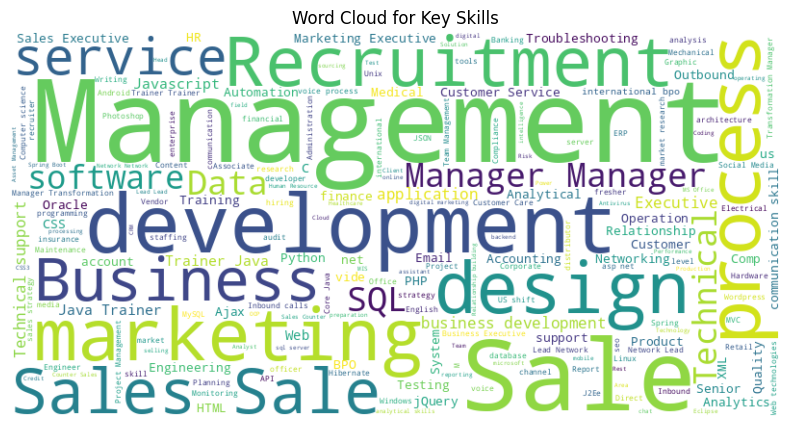

In [84]:
skills_text = ' '.join(df_modified['Key Skills'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Key Skills')
plt.show()

In [85]:
# Handle missing values in the "Job Title" column
df_modified['Job Title'].fillna('', inplace=True)

In [86]:
#Big Data job families
#Create a TF-IDF vectorizer for job titles
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_modified['Job Title'])

In [87]:
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_modified['Job Family'] = kmeans.fit_predict(tfidf_matrix)
print("\nJob Title Clusters:")
for cluster_num in range(num_clusters):
    cluster_jobs = df_modified[df_modified['Job Family'] == cluster_num]['Job Title'].unique()
    print(f"\nCluster {cluster_num + 1}:")
    print(cluster_jobs)


Job Title Clusters:

Cluster 1:
[' Opportunity For Azure Devops Architect For Hyderabad Location'
 ' Looking For Trained Freshers in MS Dynamics CRM- Hyderabad'
 ' Hiring for Tech Pm/scrum Master for Hyderabad Location'
 'Excellent Opportunity For ” Linux Device Driver ” ,for Hyderabad and Ban'
 ' Hiring For Record To Report' ' Dot Net Developer' ' Dot net Developer'
 ' Informatica Faculty Job Requirement in Hyderabad'
 ' Senior .Net Developer For Leading IT Company in Gurgaon'
 ' Hiring a Valuation Associate (female Only)'
 ' Hiring ll Azure Devops and Management Lead ll Hyderabad'
 ' Hiring going on for .US Inbound Tech Support/ Sales'
 ' Asp.net with Angular JS & Html5 - Hyderabad'
 ' Opening For Dot Net Developer @ Baner, Pune'
 ' SENIOR SOFTWARE DEVELOPER (MVC .NET)'
 ' Hiring for Domestic/ International Processes.contact the HR Asap'
 ' Walk- in | Hdfc Life | We are Hiring Freshers:5th till 20th Aug@ Delhi'
 ' Bulk Hiring Travel Sales Consultants US /UK Shifts Call ASAP'
 ' Imme

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


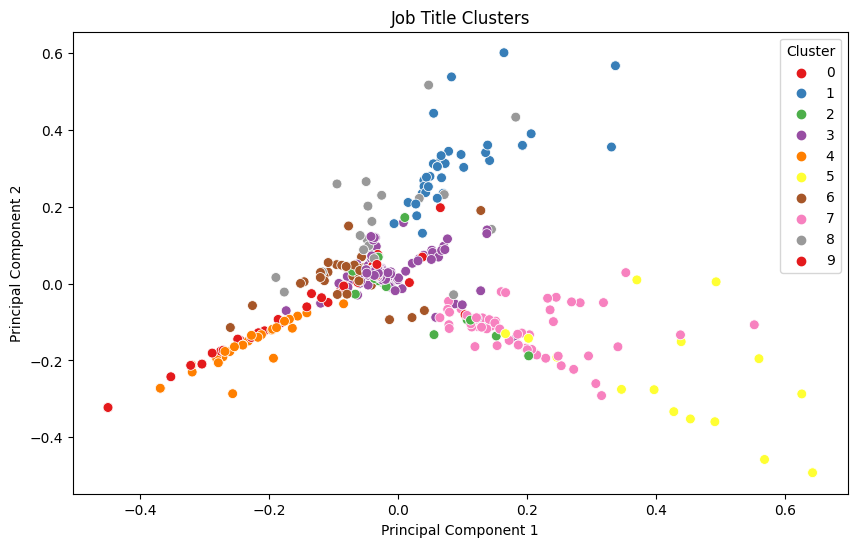

In [88]:
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())
df_modified['Cluster'] = kmeans.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tfidf_pca[:, 0], y=tfidf_pca[:, 1], hue=df_modified['Cluster'], palette='Set1', s=50)
plt.title('Job Title Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [89]:
# Handle missing values in the "Key Skills" column
df_modified['Key Skills'].fillna('', inplace=True)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
# Preprocess skills text (lowercase and remove stopwords)
stop_words = set(stopwords.words('english'))
df_modified['Key Skills'] = df_modified['Key Skills'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in stop_words]))

In [91]:
# Create a document-term matrix using CountVectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(df_modified['Key Skills'])

In [92]:
# Apply Latent Dirichlet Allocation (LDA) for topic modeling
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

LatentDirichletAllocation(random_state=42)

In [93]:
print("\nTop Skills for Each Topic:")
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_skills_idx = topic.argsort()[:-6:-1]
    top_skills = [feature_names[i] for i in top_skills_idx]
    print(f"\nTopic {topic_idx + 1}: {', '.join(top_skills)}")


Top Skills for Each Topic:

Topic 1: design, sql, net, development, web

Topic 2: manager, management, transformation, customer, asset

Topic 3: executive, marketing, skills, management, automation

Topic 4: sales, executive, business, management, marketing

Topic 5: technical, support, process, network, lead

Topic 6: management, business, development, testing, customer

Topic 7: marketing, management, media, digital, communication

Topic 8: customer, process, service, bpo, international

Topic 9: java, trainer, vide, spring, data

Topic 10: recruitment, management, finance, hr, accounting


In [94]:
# Display Patterns and Trends
print("\nPatterns and Trends within Skill Groups:")

# Group by Job Family and count occurrences of each skill
job_family_counts = df_modified.groupby('Job Family')['Key Skills'].apply(lambda x: ' '.join(x)).reset_index()
job_family_counts['Skill Count'] = job_family_counts['Key Skills'].apply(lambda x: len(set(x.split())))

# Display patterns and trends
for index, row in job_family_counts.iterrows():
    job_family = row['Job Family']
    skill_count = row['Skill Count']
    unique_skills = set(row['Key Skills'].split())

    print(f"\nJob Family {job_family} Trends:")
    print(f"Total Skills: {skill_count}")
    print(f"Unique Skills: {', '.join(unique_skills)}")
    print("\nCommon Skills:")

    # Display the top 5 common skills
    common_skills = df_modified[df_modified['Job Family'] == job_family]['Key Skills'].apply(lambda x: x.split()).explode().value_counts().head(5)
    print(common_skills)

    print("\n---------------------------")


Patterns and Trends within Skill Groups:

Job Family 0 Trends:
Total Skills: 266
Unique Skills: bootstrap|, power, ui|, care|, computer, vsts|, project, writing|, api, oracle, inventory, commerce|, aviation|, financial, quality|, agile|, integration, outbound|, closure|, channel, cloud|, master|, drivers|embedded, net, tests|, apps, talent, spot|, fresher|, level|, object, real, ajax, asp.net, process|, associate|, patching|, worldspan|, secondary, marketing, crm|, uk|, oriented, sql|, implementation|, helpdesk|, campus, back, entity, negotiation|, research|, ajax|, acquisition|, cloning, floorplan|, skills, javascript|, sales, ado.net|, dynatrace|, sox|, senior|, comp|, desk|, primetime|, bonus|, asp.net|, management, informatica, asp, group, mvc, architecture|, physical, performance, officer|, estate|, devops|, server, planning, design|, xml|, architectures|, auditing|, flex|, technical, galileo|, center|, debugging|, design, iphone|, diligence|, vlsi|, audit, azure|, travel, 2008|,

In [95]:
df_modified['Skill Group'] = lda.transform(dtm).argmax(axis=1)


In [96]:
# Display the skill groups for each job
print("\nSkill Groups for Each Job:")
print(df_modified[['Job Title', 'Key Skills', 'Skill Group']])


Skill Groups for Each Job:
                                             Job Title  \
0                                Digital Media Planner   
1                             Online Bidding Executive   
2     Trainee Research/ Research Executive- Hi- Tec...   
3                                    Technical Support   
4                    Software Test Engineer -hyderabad   
..                                                 ...   
495   Finance & OPS - Technical Consultant (dynamic...   
496      Business Development Manager-digital / Export   
497                              Sr. Software Engineer   
498                                   Website Designer   
499    Tech caller hiring a huge number of Executives.   

                                            Key Skills  Skill Group  
0                        media planning| digital media            6  
1    pre sales| closing| software knowledge| client...            6  
2    computer science| fabrication| quality check| ...           

In [97]:
#Preprocess skills text (lowercase and remove stopwords)
stop_words = set(stopwords.words('english'))
df_modified['Key Skills'] = df_modified['Key Skills'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in stop_words]))

In [98]:
# Create a document-term matrix using CountVectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(df_modified['Key Skills'])

In [99]:
# Add skill features to the DataFrame
skills_features = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())
df_modified = pd.concat([df_modified, skills_features], axis=1)

In [100]:
# Characterize skill competence based on frequency within each skill group
skill_groups = df_modified['Skill Group'].unique()
for group in skill_groups:
    group_df = df_modified[df_modified['Skill Group'] == group]
    total_jobs = group_df.shape[0]
    print(f"\nSkill Competence Characterization for Skill Group {group}:")
    skill_frequencies = group_df.iloc[:, 11:].sum(axis=0)  # Assuming skills start from the 11th column
    skill_frequencies = skill_frequencies / total_jobs
    skill_frequencies = skill_frequencies.sort_values(ascending=False)
    print(skill_frequencies)


Skill Competence Characterization for Skill Group 6:
management    0.600000
marketing     0.514286
media         0.371429
digital       0.314286
project       0.257143
                ...   
fresher       0.000000
functional    0.000000
fund          0.000000
fusion        0.000000
zend          0.000000
Length: 994, dtype: float64

Skill Competence Characterization for Skill Group 4:
support       0.741379
technical     0.672414
network       0.448276
process       0.448276
lead          0.413793
                ...   
framework     0.000000
functional    0.000000
fund          0.000000
fusion        0.000000
zend          0.000000
Length: 994, dtype: float64

Skill Competence Characterization for Skill Group 0:
sql               0.329545
net               0.329545
development       0.329545
design            0.318182
web               0.318182
                    ...   
communications    0.000000
ndt               0.000000
needs             0.000000
commodity         0.000000
accent

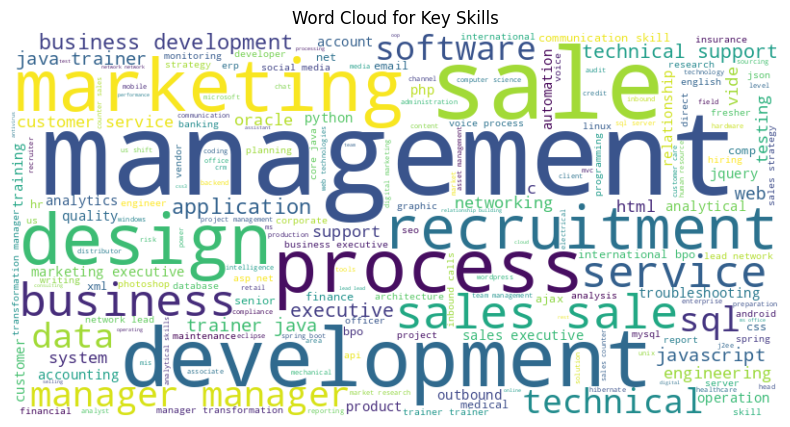

In [101]:
#Word Clouds for Key Skills:
skills_text = ' '.join(df_modified['Key Skills'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Key Skills')
plt.show()

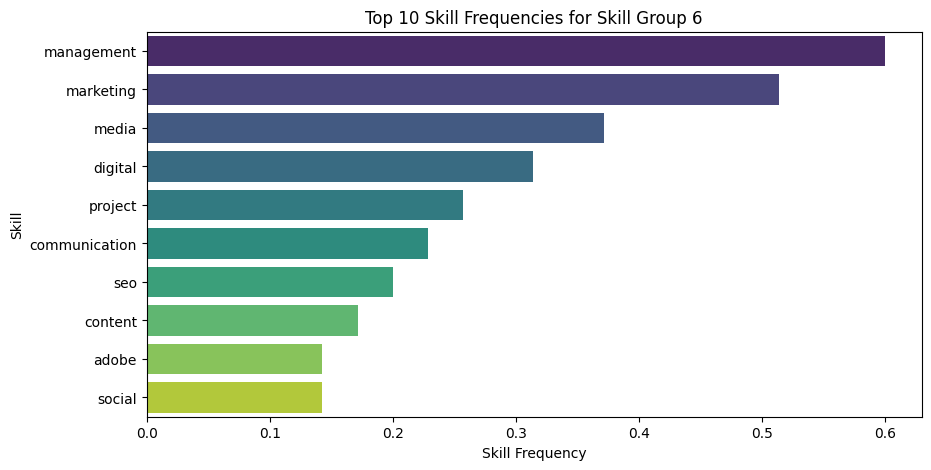

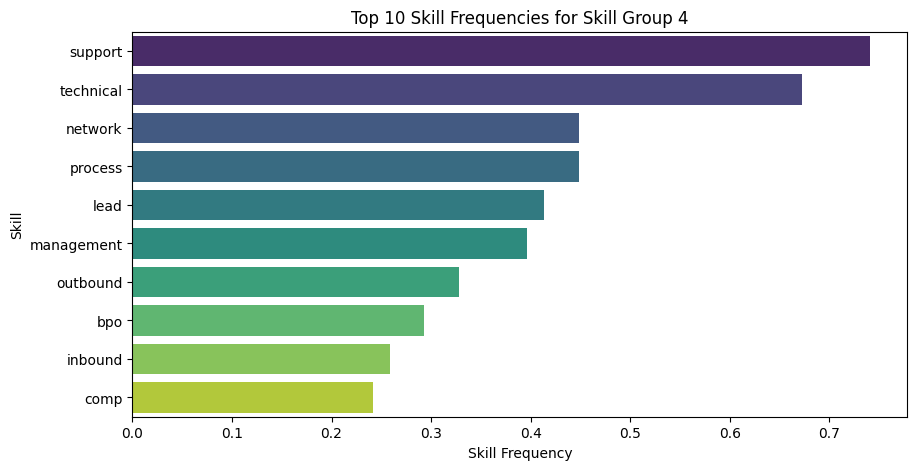

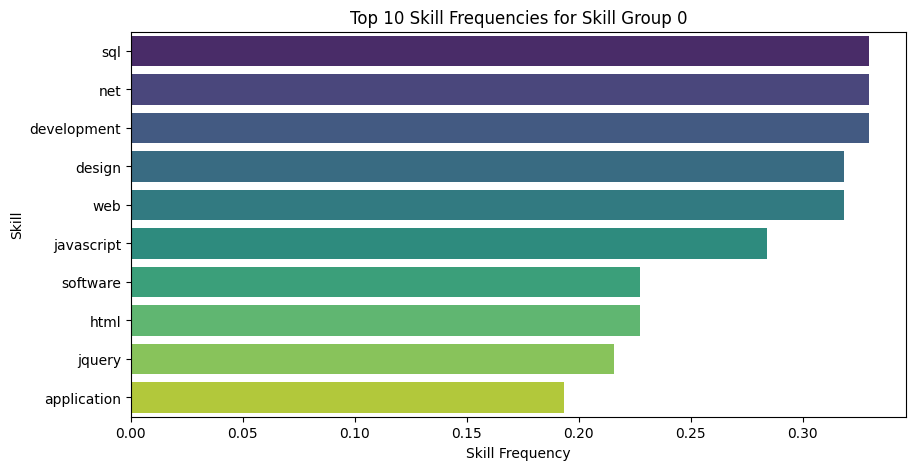

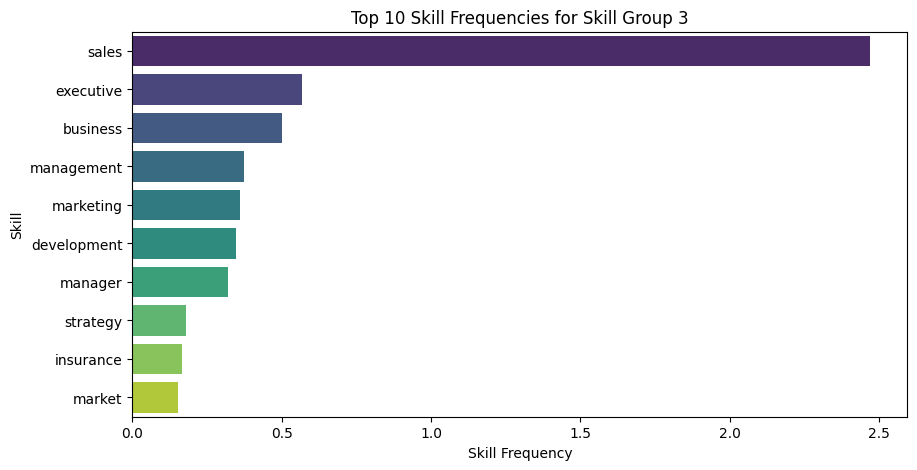

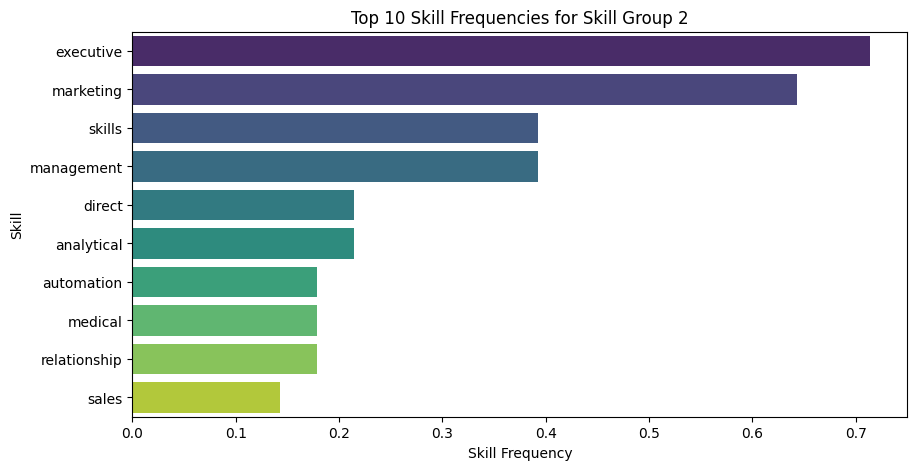

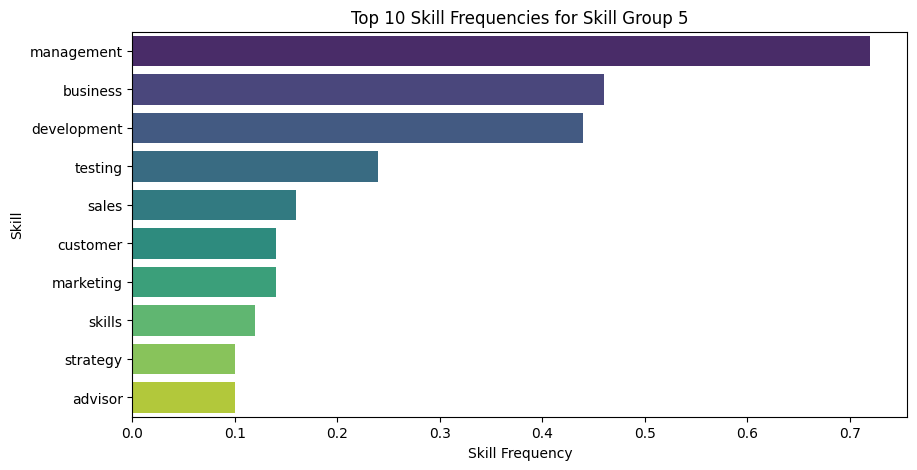

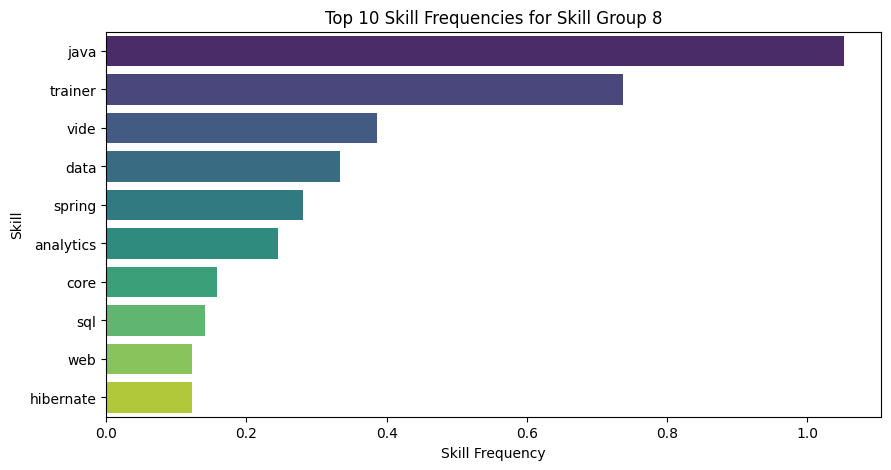

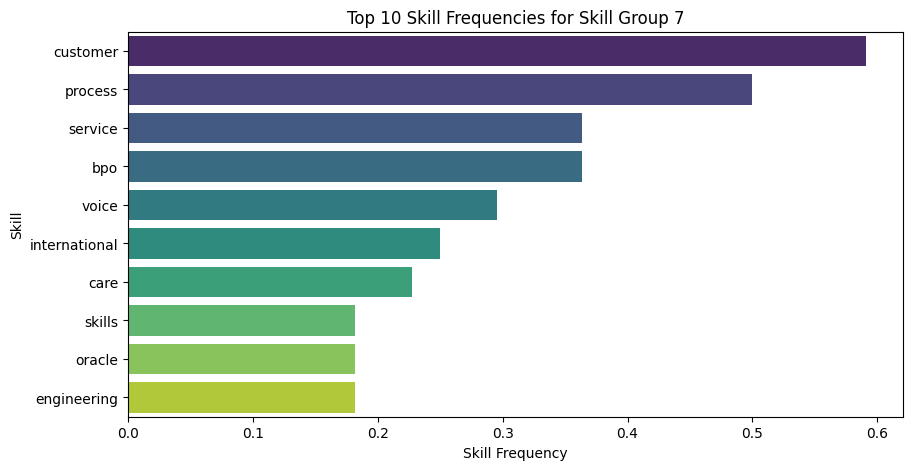

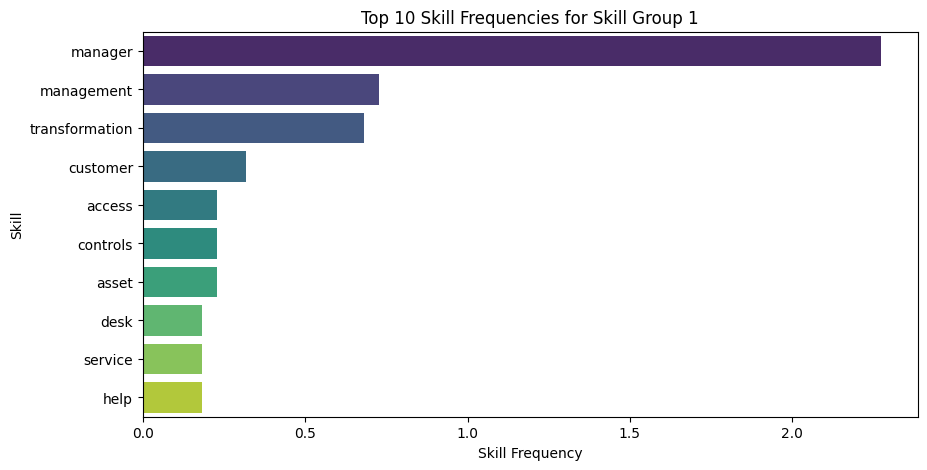

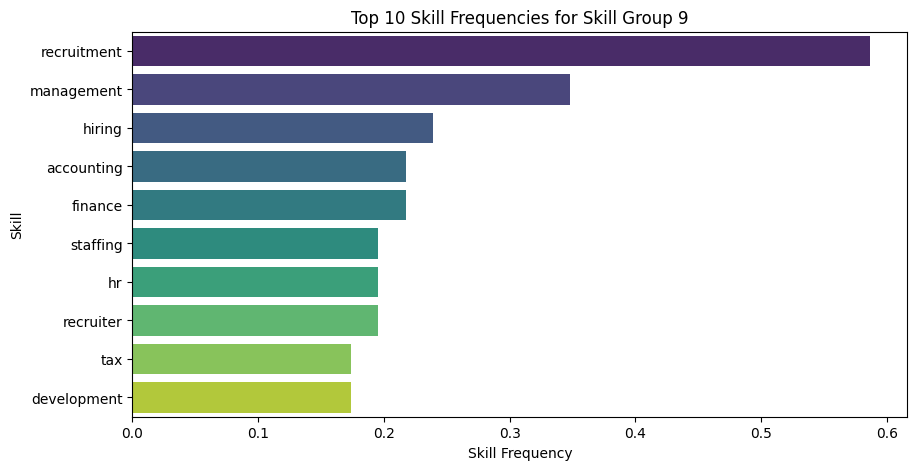

In [102]:
#Bar Charts for Skill Frequencies:
top_skills_to_display = 10  # You can adjust this based on the number of top skills you want to show
display_every_nth_skill = 2  # You can adjust this based on how many skills you want to skip on the y-axis

for group in skill_groups:
    group_df = df_modified[df_modified['Skill Group'] == group]
    total_jobs = group_df.shape[0]
    skill_frequencies = group_df.iloc[:, 11:].mean(axis=0)  # Assuming skills start from the 11th column and using mean for frequencies
    top_skills = skill_frequencies.sort_values(ascending=False).head(top_skills_to_display)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_skills, y=top_skills.index, palette='viridis')
    plt.title(f'Top {top_skills_to_display} Skill Frequencies for Skill Group {group}')
    plt.xlabel('Skill Frequency')
    plt.ylabel('Skill')
    plt.show()


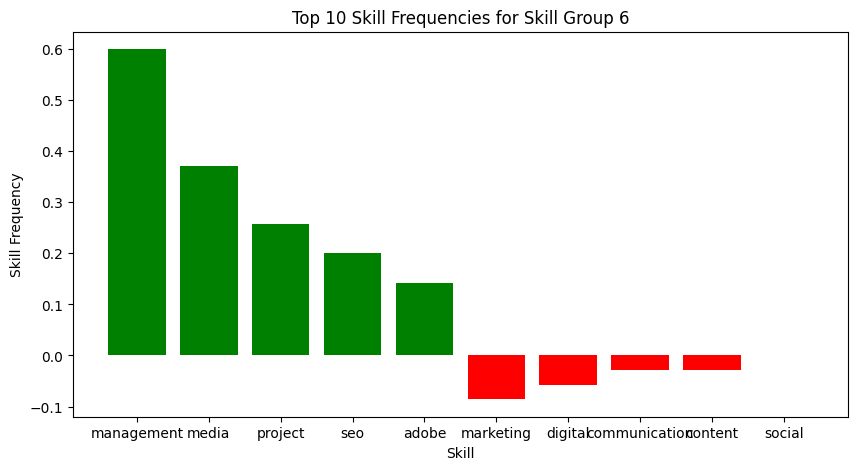

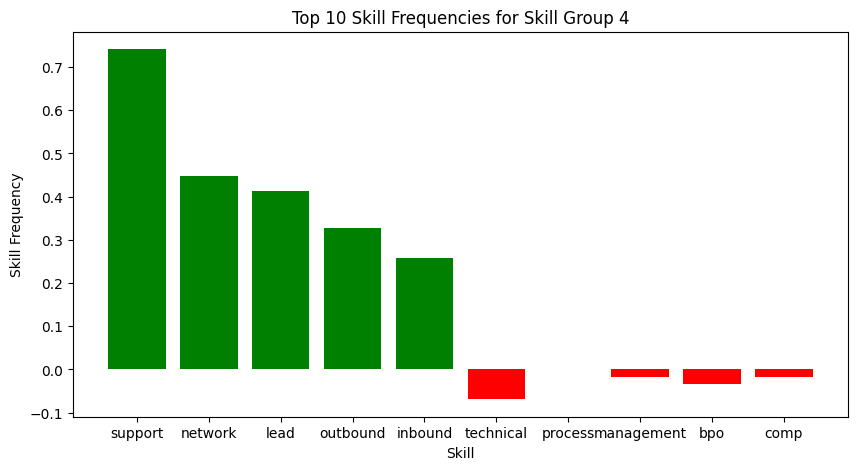

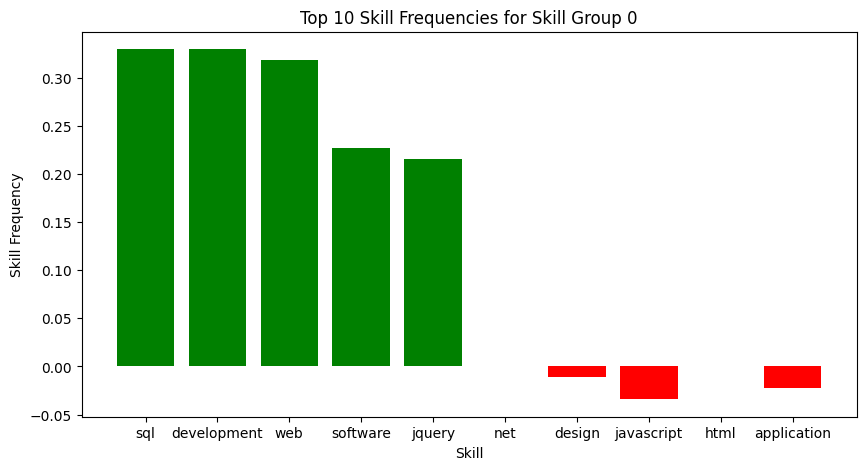

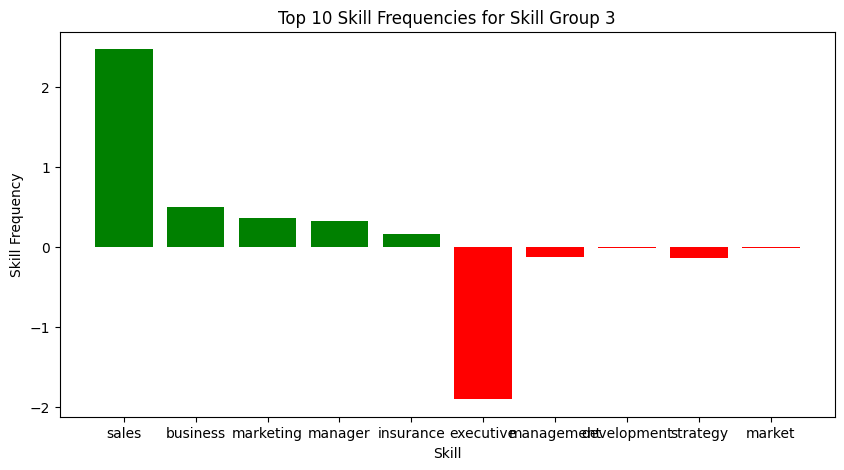

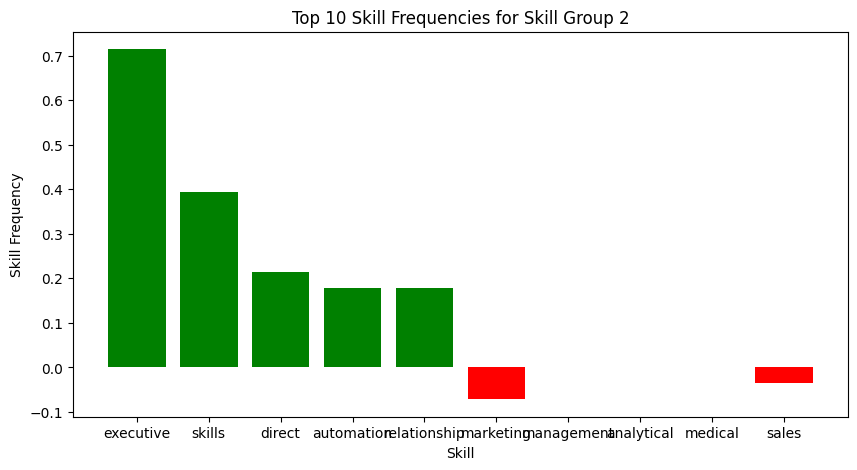

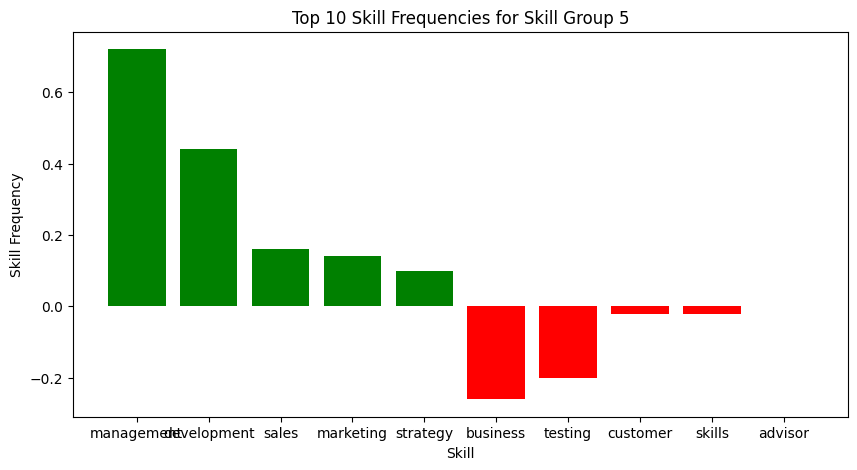

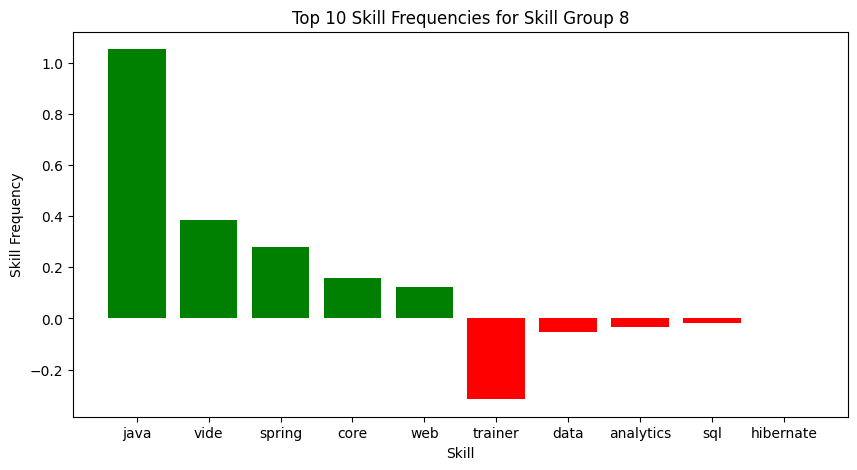

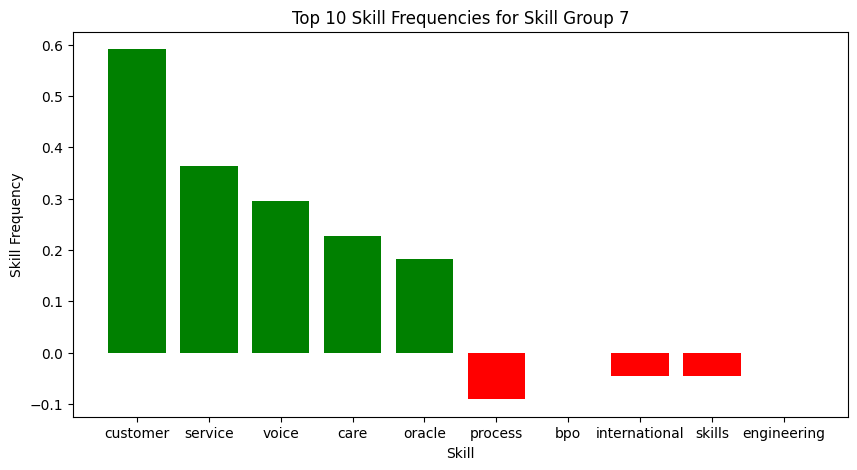

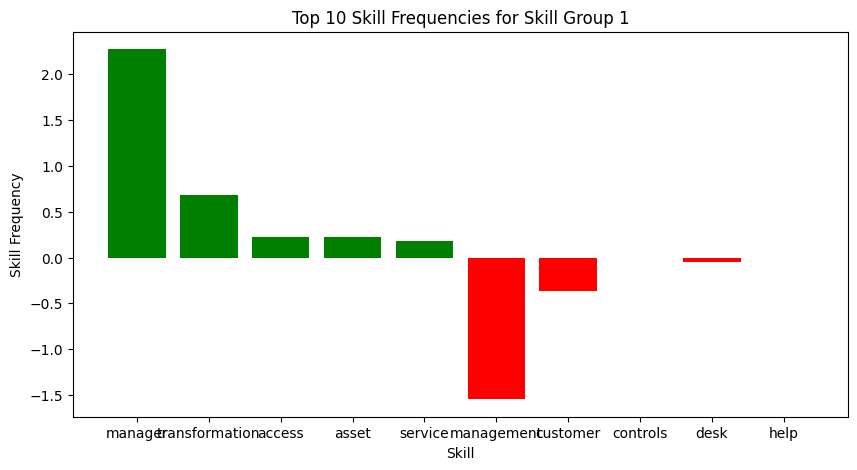

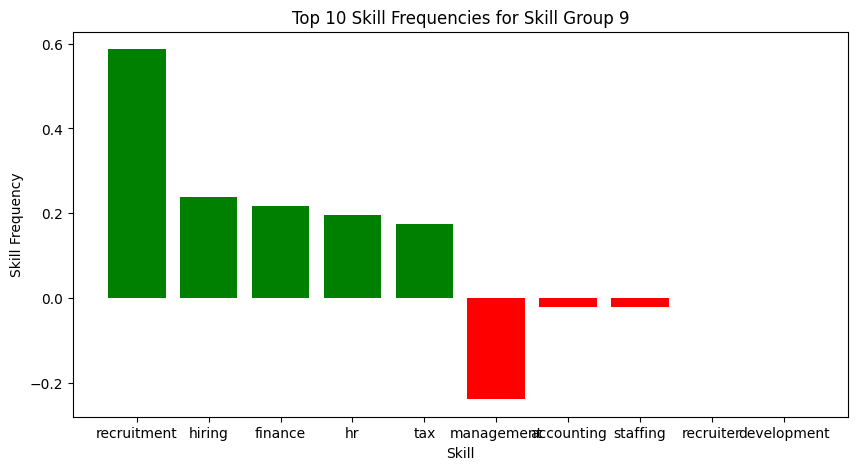

In [103]:
import matplotlib.pyplot as plt

# Assuming 'df_modified' and 'skill_groups' are defined
top_skills_to_display = 10
display_every_nth_skill = 2

for group in skill_groups:
    group_df = df_modified[df_modified['Skill Group'] == group]
    total_jobs = group_df.shape[0]
    skill_frequencies = group_df.iloc[:, 11:].mean(axis=0)
    top_skills = skill_frequencies.sort_values(ascending=False).head(top_skills_to_display)

    # Create a waterfall chart
    fig, ax = plt.subplots(figsize=(10, 5))

    # Bar chart for positive values
    ax.bar(top_skills.index[::display_every_nth_skill], top_skills.values[::display_every_nth_skill], color='green')

    # Bar chart for negative values (if any)
    bottom_values = [0] + list(top_skills.values[1::display_every_nth_skill] - top_skills.values[:-1:display_every_nth_skill])
    ax.bar(top_skills.index[1::display_every_nth_skill], bottom_values[1:], color='red')

    plt.title(f'Top {top_skills_to_display} Skill Frequencies for Skill Group {group}')
    plt.xlabel('Skill')
    plt.ylabel('Skill Frequency')
    plt.show()


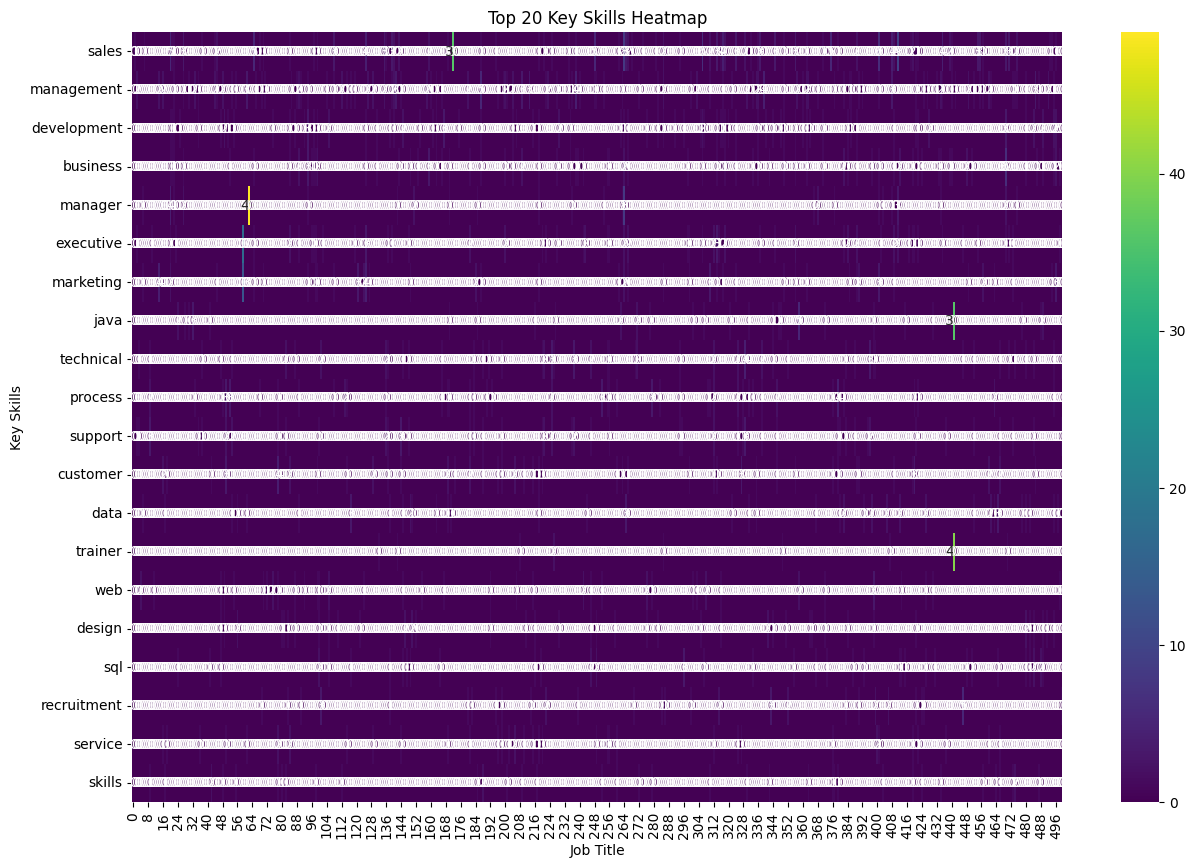

In [107]:
top_skills = df_modified.iloc[:, 11:].sum().sort_values(ascending=False)[:20].index
subset_df = df_modified[top_skills]
#Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(subset_df.T, cmap='viridis', annot=True, fmt=".0f")
plt.title('Top 20 Key Skills Heatmap')
plt.xlabel('Job Title')
plt.ylabel('Key Skills')
plt.show()